In [13]:
import os
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.metrics import classification_report
# Download and extract the dataset
!wget https://www.dropbox.com/s/4jw31k5mlzcmgis/genres.tar.gz?dl=0 -O genres.tar.gz
!tar -xvf genres.tar.gz

# Set the path to the dataset
DATASET_PATH = 'genres'

# Define genres
GENRES = ['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz',
          'metal', 'pop', 'reggae', 'rock']


--2024-08-09 07:18:07--  https://www.dropbox.com/s/4jw31k5mlzcmgis/genres.tar.gz?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.18, 2620:100:6019:18::a27d:412
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.dropbox.com/scl/fi/logv7hsjc1t3daaysuhyh/genres.tar.gz?rlkey=vcu3jvliyletkjwxz8bv8jm7c&dl=0 [following]
--2024-08-09 07:18:07--  https://www.dropbox.com/scl/fi/logv7hsjc1t3daaysuhyh/genres.tar.gz?rlkey=vcu3jvliyletkjwxz8bv8jm7c&dl=0
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucb04a5b2c0291718421abfa463c.dl.dropboxusercontent.com/cd/0/inline/CYSnhlDDDe4vmXv7h4NUFDjiXugCj6qcJtWELJR6Z5m2v9V73sIkGXC3zfQxS_qCsrFhw3nSu_hw1QbY7RLaw1fo9_YnlaEsKHG7-i2Af7bLKmeLgVr8XxEbGv9tqgEDIew/file# [following]
--2024-08-09 07:18:07--  https://ucb04a5b2c0291718421abfa463c.dl.dropboxusercontent.com/cd/0/inline/CYSn

In [16]:
def audio_to_spectrogram(audio_path, sr=22050, n_fft=2048, hop_length=512, n_mels=128):
    y, sr = librosa.load(audio_path, sr=sr)
    S = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=n_fft, hop_length=hop_length, n_mels=n_mels)
    S_dB = librosa.power_to_db(S, ref=np.max)
    return S_dB

def resize_spectrogram(spectrogram, target_shape):
    """Resize spectrogram to target shape."""
    spectrogram = librosa.util.fix_length(spectrogram, size=target_shape[1], axis=1)
    return spectrogram

def preprocess_data(dataset_path, genres, target_size=(128, 128)):
    spectrograms = []
    labels = []
    for genre in genres:
        genre_folder = os.path.join(dataset_path, genre)
        for filename in os.listdir(genre_folder):
            file_path = os.path.join(genre_folder, filename)
            spectrogram = audio_to_spectrogram(file_path)
            # Resize the spectrogram
            spectrogram = resize_spectrogram(spectrogram, target_shape=(128, 128))
            spectrograms.append(spectrogram)
            labels.append(genre)

    return np.array(spectrograms), np.array(labels)

# Load and preprocess data
spectrograms, labels = preprocess_data(DATASET_PATH, GENRES)

# Normalize and reshape data
spectrograms = np.array([np.expand_dims(s, axis=-1) for s in spectrograms])  # Add channel dimension
spectrograms = spectrograms / np.max(spectrograms)  # Normalize

# Encode labels
from tensorflow.keras.utils import to_categorical
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(labels)
num_classes = len(GENRES)
one_hot_labels = to_categorical(encoded_labels, num_classes=num_classes)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(spectrograms, one_hot_labels, test_size=0.2, random_state=42)


Epoch 1/100
20/20 [==============================] - 3s 109ms/step - loss: 1937382.3750 - accuracy: 0.0953 - val_loss: 19.5175 - val_accuracy: 0.1187
Epoch 2/100
20/20 [==============================] - 2s 103ms/step - loss: 4.0755 - accuracy: 0.0938 - val_loss: 2.3025 - val_accuracy: 0.1125
Epoch 3/100
20/20 [==============================] - 2s 102ms/step - loss: 2.3028 - accuracy: 0.0922 - val_loss: 2.3027 - val_accuracy: 0.1125
Epoch 4/100
20/20 [==============================] - 2s 105ms/step - loss: 2.3026 - accuracy: 0.0922 - val_loss: 2.3029 - val_accuracy: 0.1125
Epoch 5/100
20/20 [==============================] - 2s 99ms/step - loss: 2.3025 - accuracy: 0.1094 - val_loss: 2.3032 - val_accuracy: 0.0500
Epoch 6/100
20/20 [==============================] - 2s 100ms/step - loss: 2.3022 - accuracy: 0.1141 - val_loss: 2.3034 - val_accuracy: 0.0500
Epoch 7/100
20/20 [==============================] - 2s 102ms/step - loss: 2.3026 - accuracy: 0.1109 - val_loss: 2.3036 - val_accuracy: 

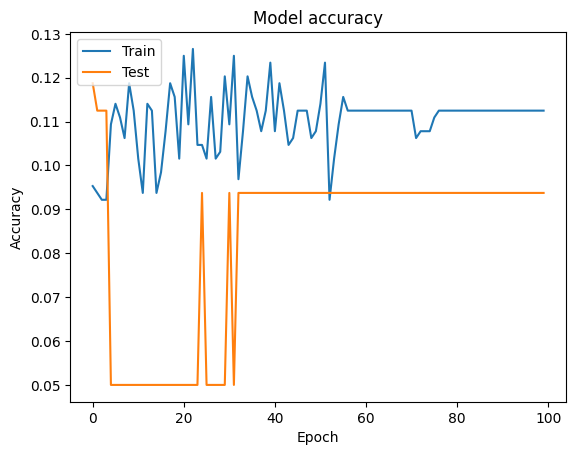

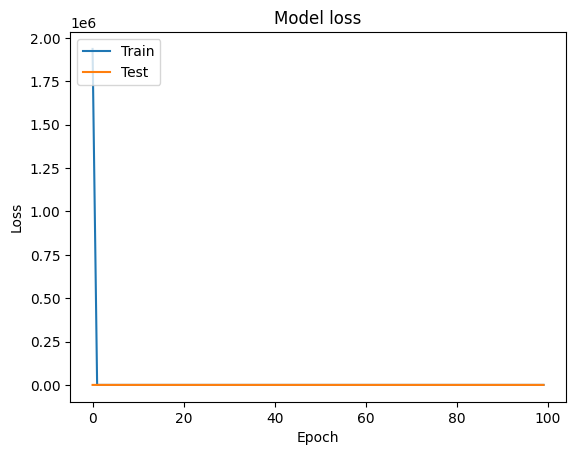

In [22]:
import numpy as np
import os
import librosa
import librosa.display
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# TensorFlow/Keras imports
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical

# Define the 2D CNN model
def build_cnn_model(input_shape, num_classes):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))
    return model

# Build the model
input_shape = (spectrograms.shape[1], spectrograms.shape[2], 1)  # (height, width, channels)
model = build_cnn_model(input_shape, num_classes)

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train,
                    epochs=100,
                    batch_size=32,
                    validation_split=0.2,
                    verbose=1)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy * 100:.2f}%')

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [23]:
from sklearn.metrics import classification_report
import numpy as np

# Assuming 'model' is your trained model and 'X_test' is your test set
# Make predictions
y_pred_proba = model.predict(X_test)  # Get probabilities from the model
y_pred_classes = np.argmax(y_pred_proba, axis=1)  # Convert probabilities to class indices

# Convert one-hot encoded labels to class indices
y_true_classes = np.argmax(y_test, axis=1)

# Define genres
GENRES = ['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz',
          'metal', 'pop', 'reggae', 'rock']

# Calculate and print precision, recall, and F1-score
report = classification_report(y_true_classes, y_pred_classes, target_names=GENRES)
print(report)


7/7 [==============================] - 0s 23ms/step
              precision    recall  f1-score   support

       blues       0.00      0.00      0.00        20
   classical       0.07      1.00      0.12        13
     country       0.00      0.00      0.00        27
       disco       0.00      0.00      0.00        21
      hiphop       0.00      0.00      0.00        15
        jazz       0.00      0.00      0.00        22
       metal       0.00      0.00      0.00        25
         pop       0.00      0.00      0.00        13
      reggae       0.00      0.00      0.00        23
        rock       0.00      0.00      0.00        21

    accuracy                           0.07       200
   macro avg       0.01      0.10      0.01       200
weighted avg       0.00      0.07      0.01       200



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
